<a href="https://colab.research.google.com/github/jlgrons/JSC270_HW2/blob/main/JSC270_Assignment2_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [2]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [3]:
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Part2 DataAnalysis
# Q1, About the data types of each column, age, fnlwgt, education_num,capital_gain, capital_loss, hours_per_week should be int from the text description,
# and the workclass, education, marital_status, occupation, relationship, race, sex, native_country, gross_income_group should all be strings, which perfectly fit with the type of our # dataset.
print(income94.dtypes)
# Q2, About the missing data, and the count of the missing data in each column.
income94.replace(' ?', np.nan, inplace=True)
missing_values_count = income94.isnull().sum()
print(missing_values_count)

age                    int64
workclass             object
fnlwgt                 int64
education             object
education_num          int64
marital_status        object
occupation            object
relationship          object
race                  object
sex                   object
capital_gain           int64
capital_loss           int64
hours_per_week         int64
native_country        object
gross_income_group    object
dtype: object
age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


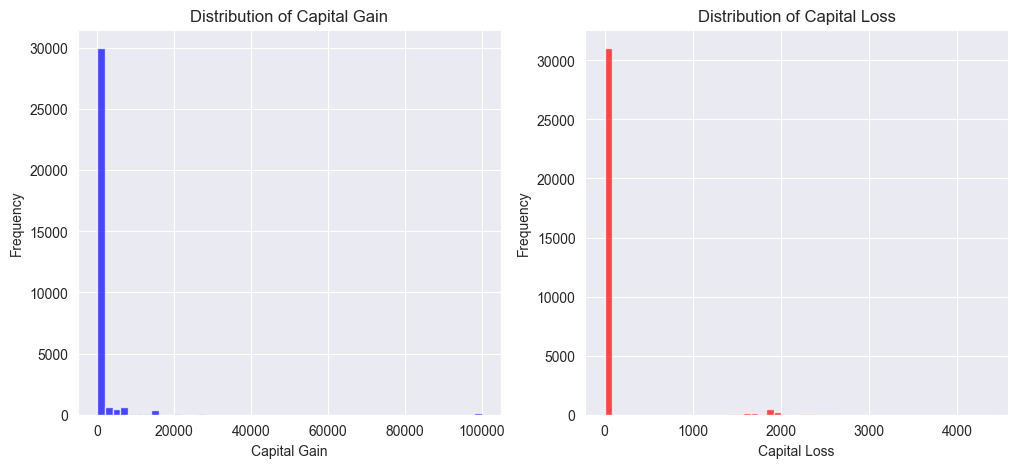

In [5]:
#Q3, first plot the distribution of capital_gain and capital_loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(income94['capital_gain'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(income94['capital_loss'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()
# As we can observed from the graph, majority individuals have no capital gain or loss, it will be hard to see the distribution with numerical data. Hence
# I think we can use the categorical data to plot the distribution of capital gain and loss. By set capital gain into categoies, if it's 0 then its no gain, if its from 1-5000 then its low gain, if its from 5000-15000 then its medium gain, if its greater than 15000 then its high gain, then for the capital loss, if its 0 then its no loss, if its from 1-2000 then its low loss, if its greater than 2000 then its high loss. Then we can plot the bar graph to show the distribution of capital gain and loss.
# First we creat the new column for capital gain and loss category.
def categorize_gain(value):
    if value == 0:
        return 'No Gain'
    elif value <= 5000:
        return 'Low Gain'
    elif value <= 15000:
        return 'Medium Gain'
    else:
        return 'High Gain'
income94['capital_gain_category'] = income94['capital_gain'].apply(categorize_gain)
def categorize_loss(value):
    if value == 0:
        return 'No Loss'
    elif value <= 2000:
        return 'Low Loss'
    else:
        return 'High Loss'
income94['capital_loss_category'] = income94['capital_loss'].apply(categorize_loss)
capital_gain_counts = income94['capital_gain_category'].value_counts()
capital_loss_counts = income94['capital_loss_category'].value_counts()


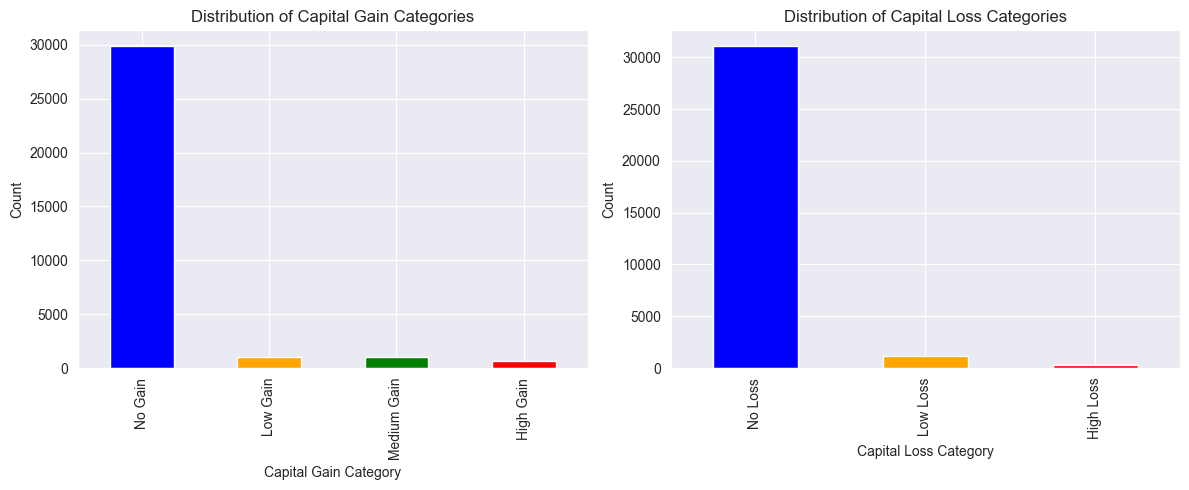

In [6]:
# graphical expression of Q3 for the categorical data of capital gain and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
income94['capital_gain_category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Capital Gain Categories')
plt.xlabel('Capital Gain Category')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
income94['capital_loss_category'].value_counts().plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Distribution of Capital Loss Categories')
plt.xlabel('Capital Loss Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

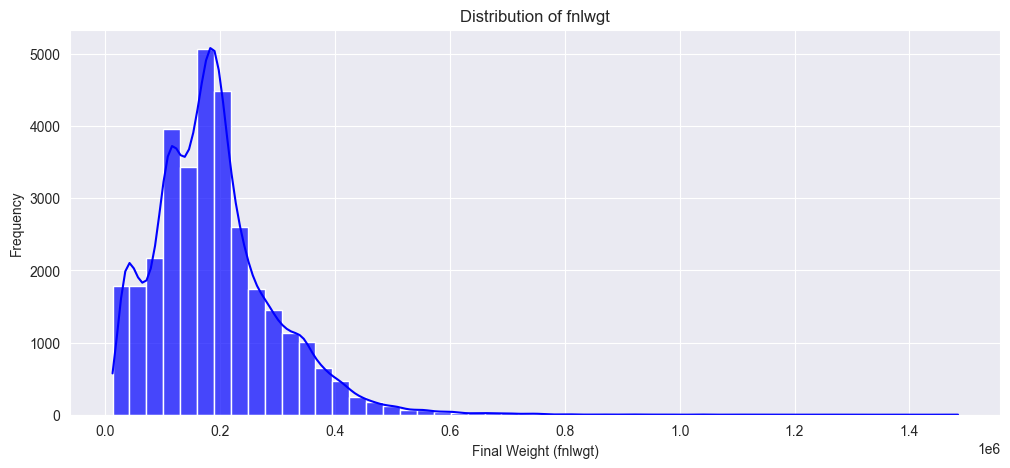

C:\Users\NKwyk\AppData\Local\Temp\ipykernel_20960\381766863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='fnlwgt', data=income94, palette='coolwarm')


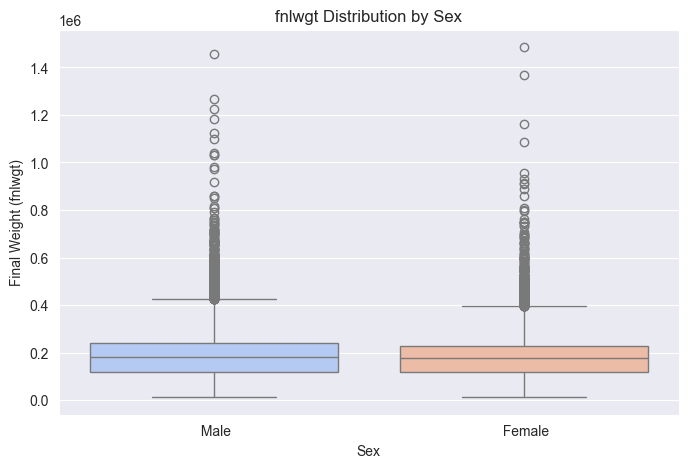

In [7]:
#Q4 About the variable fnlwgt, first we plot it to see the skewness of the data
plt.figure(figsize=(12, 5))
sns.histplot(income94['fnlwgt'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of fnlwgt')
plt.xlabel('Final Weight (fnlwgt)')
plt.ylabel('Frequency')
plt.show()
# Analysing the aboving graph, the graph is right skewed, majority data are located around the lower range, and obviously it's not symmetric, there exist some high outliers with the large fnlwgt values.
# Then we use the bloxpolt to represent the difference between the men and women
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='fnlwgt', data=income94, palette='coolwarm')
plt.title('fnlwgt Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Weight (fnlwgt)')
plt.show()
# we can see from the graph that there exist too many outliers, which there value is way more than the median of the whole data set, so I think we can indeed exclude those outliers. By using the formula of determine outliers which is Q3 + 1.5*IQR and Q1 - 1.5*IQR, we can find the outliers and exclude them.

C:\Users\NKwyk\AppData\Local\Temp\ipykernel_20960\3041310271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='fnlwgt', data=income94_filtered, palette='coolwarm')


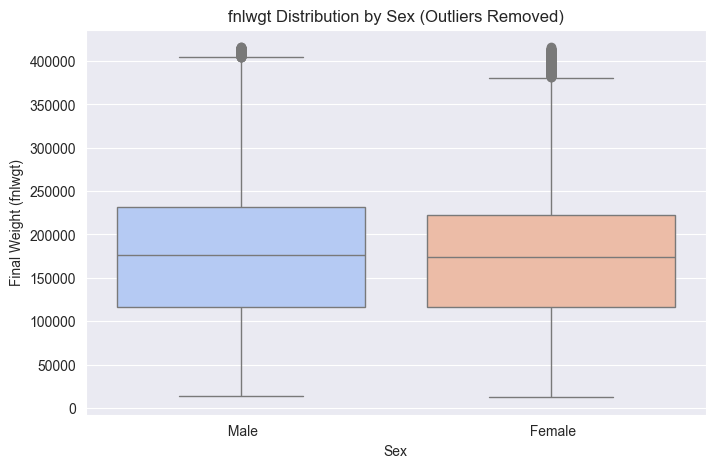

In [8]:
# The boxplot that removed the outliers, easier to observe the pattern, we can observe that the median of the men is slightly higher than the women, which means the women have higher fnlwgt value. but approximately they have similar distribution, so sex may not be a huge factor that influence the fnlwgt value.
Q1 = income94['fnlwgt'].quantile(0.25)
Q3 = income94['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
income94_filtered = income94[(income94['fnlwgt'] >= lower_bound) & (income94['fnlwgt'] <= upper_bound)]
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='fnlwgt', data=income94_filtered, palette='coolwarm')
plt.title('fnlwgt Distribution by Sex (Outliers Removed)')
plt.xlabel('Sex')
plt.ylabel('Final Weight (fnlwgt)')
plt.show()
# In the end we set the outliers to be the missing values
income94.loc[(income94['fnlwgt'] < lower_bound) | (income94['fnlwgt'] > upper_bound), 'fnlwgt'] = np.nan

Correlation Matrix:
                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


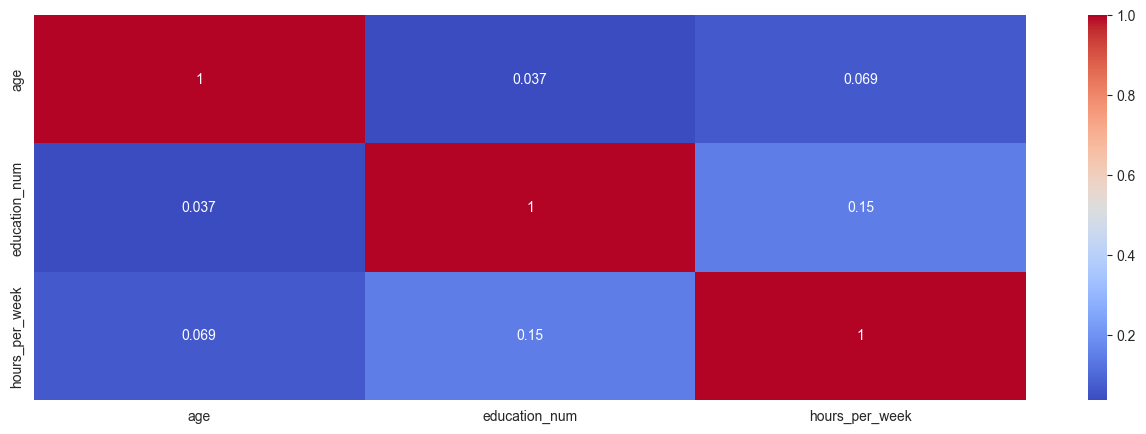

In [13]:
# For the next part, we are going to analysis of the correlations
# Since we want to find the correlation of age, education_num and hours_per_week, we need to compute the correlation matrix and represented as graph
correlation_matrix = income94[['age', 'education_num', 'hours_per_week']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(16, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
#a: Since the correlation between age and education_num and hours_per_week are pretty low, so those are weakly correlated, then for the education_num and hours_per_week, their 
# correlation is higher compare to the correlation of age, so those two are more correlated. I am makng these assesment by the numbers inside the correlation matrix

In [21]:
from scipy.stats import pearsonr
# b: Compute Pearson correlation and p-values for variable pairs with correlation > |0.1|
corr, p_value = pearsonr(income94['age'], income94['education_num'])
corr1, p_value1 = pearsonr(income94['age'], income94['hours_per_week'])
corr2, p_value2 = pearsonr(income94['education_num'], income94['hours_per_week'])
print("correlations are "+ str({corr.round(3), corr1.round(3), corr2.round(3)}) + " p_values are " + str({p_value.round(3), p_value1.round(3), p_value2.round(3)}))
# From the below correlations we observed, only hours per week and education num, only those two have the correlation coefficient that is greater than 0.1, which is 
# 0.148, it also fit our observation in the part a from the correlation matrix.

correlations are {0.037, 0.069, 0.148} p_values are {0.0}


In [23]:
# c: we want to find the correlation between education_num and age for both male and female
income94['sex'] = income94['sex'].str.lower().str.strip()
male_data = income94[income94['sex'] == 'male']
female_data = income94[income94['sex'] == 'female']
corr_male, pval_male = stats.pearsonr(male_data['education_num'], male_data['age'])
corr_female, pval_female = stats.pearsonr(female_data['education_num'], female_data['age'])
print(f"Male Correlation: {corr_male:.4f}, p-value: {pval_male:.4f}")
print(f"Female Correlation: {corr_female:.4f}, p-value: {pval_female:.4f}")
# what those values represented is that with the increase in ages, there will be slightly increase in education_num for male and decrease for female.
# the p-value also illustrate that the correlation is statistically significant for male but not strongly suggested for the female group.


Male Correlation: 0.0605, p-value: 0.0000
Female Correlation: -0.0179, p-value: 0.0632


In [25]:
#d: First we compute covariance matrix for education_num and hours_per_week
covariance_matrix = income94[['education_num', 'hours_per_week']].cov()
print("\nCovariance Matrix:")
print(covariance_matrix)
# what it shows out is that the variance between education_num and hours_per_week is 4.70, the variance for education_num is 6.62, but 
# the variance for hours_per_week is very huge here, which is 152, means the working hours per weeks are very different for different people.
#but the same education nums are not that different compare to it, and there is also a weak positive relationship between education_num and hours_per_week.


Covariance Matrix:
                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


In [43]:
# Then we discuss the regression problem
#a: for the linear regression of the hours per week and the only dependent variable sex
income94['sex_numeric'] = income94['sex'].apply(lambda x: 1 if x.strip() == 'male' else 0)
X1 = sm.add_constant(income94['sex_numeric'])
y = income94['hours_per_week']
model1 = sm.OLS(y, X1).fit()
print(model1.summary())
# as we can see from the summary, the coefficient of sex_numeric is 6.017,which shows on average, men work about 6 more hours per week compared to women.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:34:52   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.4104      0.116    314.412      

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex_numeric, Length: 32561, dtype: int64

In [45]:
#b: we add up the education_num as the control variable
X2 = sm.add_constant(income94[['sex_numeric', 'education_num']])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())
# for the 95% confidence interval that we wanted
conf_interval_edu = model2.conf_int().loc['education_num']
print("\n95% Confidence Interval for Education Num in Model 2:", conf_interval_edu)
# we can see that the coefficient of education num is 0.7109,means that each additional year of education is associated with working 0.71 more hours per week.
# the trend of the sex drop from 6.017 to 5.97, but men still worked approximately 6h per week
# since the p_value is less than 0.05, we can say that it's indeed statistically significant. The 95% Confidence Interval is [0.647, 0.748]


                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:37:39   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.4106      0.281    104.556

In [52]:
#c : we add up the gross income group as additional variable
income94['income_binary'] = income94['gross_income_group'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
X3 = sm.add_constant(income94[['sex_numeric', 'education_num', 'income_binary']])  # Model 3: Sex + education_num + income_binary
model3 = sm.OLS(y, X3).fit()
print(model3.summary())
# The coefficient for sex represent that men tend to work 5h more per week account the influence of the income binary and the education num
# This suggests that income level explains part of the gender difference in work hours, but the education num did not. For the best model, the r-square 
# value for each three model are 0.053, 0.074 and 0.094, which means that more data is captured by the model3. also the model with low RSE and RMSE tend to be a better model
# However, we can only directly see the r_squred here and is higher the value of r^2 represent a better model.

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:42:20   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.4218      0.288    109.184

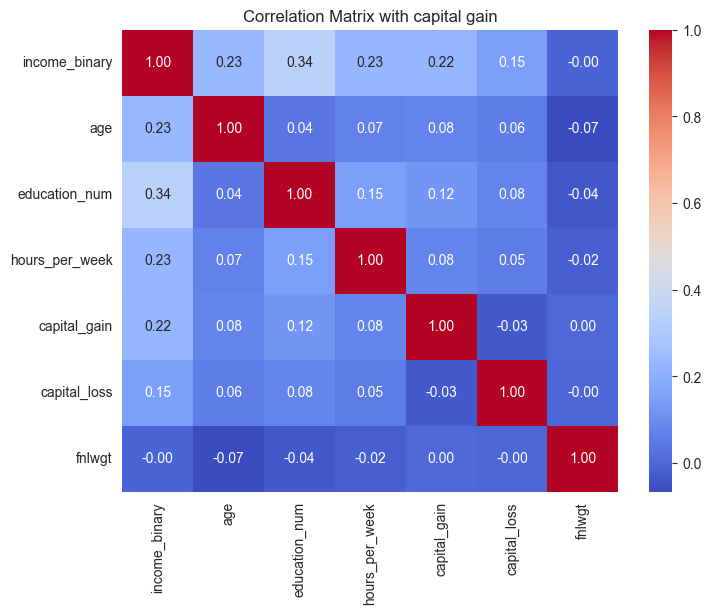

In [92]:
#part3 I want to predict the capital gain by some variables, first to find out which of these variables are correlated with the
# capital gain, we first express those variables in the correlation matrix
# Selecting numerical columns for correlation
correlation_matrix = income94[['income_binary', 'age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss', 'fnlwgt']].corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with capital gain")
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

# Copy dataset, since we don't want to modify the original dataset
# start up with age, let age be the initial baseline model
df = income94.copy()
X = df[['age']].copy() 
y = df['capital_gain'].copy()
# Handle missing & infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X.dropna(inplace=True)  # Remove missing values
y = y.loc[X.index] 
X_baseline = sm.add_constant(X)  
model1 = sm.OLS(y, X_baseline).fit()
print(model1.summary())
# Compute RMSE & RSE value
rse1 = np.sqrt(model1.mse_resid)
rmse1 = np.sqrt(mean_squared_error(y, model1.predict(X_baseline)))
print(f"Model 1 (Age Only): RSE = {rse1:.4f}, RMSE = {rmse1:.4f}, R^2 = {model1.rsquared:.4f}")



                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           9.28e-45
Time:                        21:25:42   Log-Likelihood:            -3.3613e+05
No. Observations:               32561   AIC:                         6.723e+05
Df Residuals:                   32559   BIC:                         6.723e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -544.9036    122.418     -4.451      0.0

In [71]:
#Add up the another variable education_num to improve the model
X_edu = df[['age', 'education_num']].copy()
X_edu = sm.add_constant(X_edu)
model2 = sm.OLS(y, X_edu).fit()
print(model2.summary())
# Compute RMSE & RSE
rse2 = np.sqrt(model2.mse_resid)
rmse2 = np.sqrt(mean_squared_error(y, model2.predict(X_edu)))
print(f"Model 2 (+Education): RSE = {rse2:.4f}, RMSE = {rmse2:.4f}, R^2 = {model2.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     339.1
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          1.83e-146
Time:                        21:23:40   Log-Likelihood:            -3.3589e+05
No. Observations:               32561   AIC:                         6.718e+05
Df Residuals:                   32558   BIC:                         6.718e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3924.5460    196.688    -19.953

In [72]:
#Add up the another variable hours_per_week to improve the model
X_hours = df[['age', 'education_num', 'hours_per_week']].copy()
X_hours = sm.add_constant(X_hours)
model3 = sm.OLS(y, X_hours).fit()
print(model3.summary())
# Compute RMSE & RSE
rse3 = np.sqrt(model3.mse_resid)
rmse3 = np.sqrt(mean_squared_error(y, model3.predict(X_hours)))
print(f"Model 3 (+Hours Worked): RSE = {rse3:.4f}, RMSE = {rmse3:.4f}, R^2 = {model3.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     262.0
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          4.67e-168
Time:                        21:23:50   Log-Likelihood:            -3.3584e+05
No. Observations:               32561   AIC:                         6.717e+05
Df Residuals:                   32557   BIC:                         6.717e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4988.7119    221.952    -22.

In [78]:
#Add up the variables capital loss and income binary to improve the model
X_capital = df[['age', 'education_num', 'hours_per_week', 'capital_loss']].copy()
X_capital = sm.add_constant(X_capital)
model4 = sm.OLS(y, X_capital).fit()
print(model4.summary())
# Compute RMSE & RSE
rse4 = np.sqrt(model4.mse_resid)
rmse4 = np.sqrt(mean_squared_error(y, model4.predict(X_capital)))
print(f"Model 4 (+Capital Loss): RSE = {rse4:.4f}, RMSE = {rmse4:.4f}, R^2 = {model4.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     216.2
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          2.03e-183
Time:                        21:26:06   Log-Likelihood:            -3.3580e+05
No. Observations:               32561   AIC:                         6.716e+05
Df Residuals:                   32556   BIC:                         6.717e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5111.4602    222.136    -23.

In [80]:
#Add up the variables capital loss and income binary to improve the model
X_capital = df[['age', 'education_num', 'hours_per_week', 'capital_loss', "income_binary"]].copy()
X_capital = sm.add_constant(X_capital)
model5 = sm.OLS(y, X_capital).fit()
print(model5.summary())
# Compute RMSE & RSE
rse5 = np.sqrt(model5.mse_resid)
rmse5 = np.sqrt(mean_squared_error(y, model5.predict(X_capital)))
print(f"Model 5 (+income bianry): RSE = {rse5:.4f}, RMSE = {rmse5:.4f}, R^2 = {model5.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     404.8
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:28:00   Log-Likelihood:            -3.3525e+05
No. Observations:               32561   AIC:                         6.705e+05
Df Residuals:                   32555   BIC:                         6.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2513.1990    231.664    -10.

In [90]:
#Add up the variable fnlwgt to improve the model
# Drop rows where 'fnlwgt' is missing
df = df.dropna(subset=['fnlwgt'])
# Select predictor variables
X_final = df[['age', 'education_num', 'hours_per_week', 'capital_loss', "income_binary", "fnlwgt"]].copy()
X_final = sm.add_constant(X_final)  # Add intercept
# Ensure target variable aligns with X_final
y_final = df.loc[X_final.index, 'capital_gain']
# Check if X_final and y_final have the same length
assert X_final.shape[0] == y_final.shape[0], "Mismatch between X and y lengths!"
model6 = sm.OLS(y_final, X_final).fit()
print(model6.summary())
# Compute RMSE & RSE
rse6 = np.sqrt(model6.mse_resid)
rmse6 = np.sqrt(mean_squared_error(y_final, model6.predict(X_final)))
print(f"Model 6 (+Final Weight): RSE = {rse6:.4f}, RMSE = {rmse6:.4f}, R^2 = {model6.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:           capital_gain   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     325.5
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:33:43   Log-Likelihood:            -3.2503e+05
No. Observations:               31569   AIC:                         6.501e+05
Df Residuals:                   31562   BIC:                         6.501e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2575.0441    255.574    -10.

In [91]:
# An general conclusion for the r squre and the rmse and rse value for all the models
models = {
    "Model 1 (Age)": (rse1, rmse1, model1.rsquared),
    "Model 2 (+Education)": (rse2, rmse2, model2.rsquared),
    "Model 3 (+Hours Worked)": (rse3, rmse3, model3.rsquared),
    "Model 4 (+Capital Loss)": (rse4, rmse4, model4.rsquared),
    "Model 5 (+income binary)": (rse5, rmse5, model5.rsquared),
    "Model 6 (+Final Weight)": (rse6, rmse6, model6.rsquared),
}

for name, (rse, rmse, r2) in models.items():
    print(f"{name}: RSE = {rse:.4f}, RMSE = {rmse:.4f}, R^2 = {r2:.4f}")


Model 1 (Age): RSE = 7363.0925, RMSE = 7362.8664, R^2 = 0.0060
Model 2 (+Education): RSE = 7309.7879, RMSE = 7309.4511, R^2 = 0.0204
Model 3 (+Hours Worked): RSE = 7298.0484, RMSE = 7297.6001, R^2 = 0.0236
Model 4 (+Capital Loss): RSE = 7289.5727, RMSE = 7289.0130, R^2 = 0.0259
Model 5 (+income binary): RSE = 7166.4194, RMSE = 7165.7591, R^2 = 0.0585
Model 6 (+Final Weight): RSE = 7166.1359, RMSE = 7165.3414, R^2 = 0.0583
